In [1]:
import pandas as pd
import numpy as np

# 히트맵 그려보기
# %amtplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
sanbul = pd.read_excel('C:\project22\sanbul.xls'
                       , sheet_name = "Sheet1")

In [3]:
# 열 이름이 되야할 데이터 추출
index_fix = sanbul.loc[1]

# 열이름 변경
sanbul.columns = index_fix

# 필요없는 행 제거
sanbul = sanbul.drop([0, 1])

# 년 월 일 합치기?
# 날짜 데이터와 형태 같게 만들기 yyyy-mm-dd
sanbul['tm'] = sanbul['발생일시_년'] + '-' + sanbul['발생일시_월'] + '-' + sanbul['발생일시_일']

sanbul['mon_region'] = sanbul['발생일시_월'] + sanbul['발생장소_시도']

# 발생장소_시도 = 강원, 경북, 울진만 추출
condition = (sanbul.발생장소_시도 == '강원')
sanbul_region = sanbul[condition]



In [4]:
# 필요 한 열 추출
sanbul_data = sanbul_region[['tm', 'mon_region','발생일시_월','발생일시_시간','발생장소_시도', '발생장소_시군구', '발생원인_구분', '피해면적_합계']]
# 결츨치 확인 = 없음
sanbul_data.isnull().sum()

1
tm            0
mon_region    0
발생일시_월        0
발생일시_시간       0
발생장소_시도       0
발생장소_시군구      0
발생원인_구분       0
피해면적_합계       0
dtype: int64

In [5]:
# sanbul.groupby('발생장소_시도').count()

In [6]:
# sanbul.groupby('발생일시_월').count()
# 추출할 열 2 ,3, 4, 5, 6

In [7]:
# sanbul_region.groupby('mon_region').count()

In [8]:
month = (sanbul_region.발생일시_월 == '02') | (sanbul_region.발생일시_월 == '03') | (sanbul_region.발생일시_월 == '04')| (sanbul_region.발생일시_월 == '05')
sanbul_mon = sanbul_region[month]

In [9]:
# sabul_count = sanbul_mon.groupby('mon_region').count()

In [10]:
wether = pd.read_csv('C:\project22\python\wether_dataframe_gang.csv', encoding = 'euc-kr')
wether.drop(['Unnamed: 0', 'index', 'stnId'], axis = 1, inplace=True)

# wether_2 = pd.read_csv('C:\project22\python\OBS_AWS_DD_20220714142558.csv', encoding = 'euc-kr')
# wether_2.drop(['지점'], axis=1, inplace=True)

# index_name = ['stnNm', 'tm', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'sumRn', 'maxInsWs', 'maxInsWsHrmt', 'avgWs', 'maxInsWsWd']
# wether_2.columns = index_name

wether.loc[wether['stnNm'] == '정선군', 'stnNm'] = '정선'

C:\Users\user\AppData\Local\Temp\ipykernel_22556\3450389795.py:1: DtypeWarning: Columns (62) have mixed types. Specify dtype option on import or set low_memory=False.
  wether = pd.read_csv('C:\project22\python\wether_dataframe_gang.csv', encoding = 'euc-kr')


In [11]:
# 산불발생 날, 장소와 날씨 합치기 위한 기준열 만들어주기
sanbul_mon['day_place'] = sanbul_mon['tm'] + sanbul_mon['발생장소_시군구']
wether['day_place'] = wether['tm'] + wether['stnNm']

# 데이터 합치기
sanbul_wether = pd.merge(wether, sanbul_mon, on = 'day_place')

# sanbul_wether.rename(columns = {'피해면적_합계' : 'damaged_area'}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_22556\3926923954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_mon['day_place'] = sanbul_mon['tm'] + sanbul_mon['발생장소_시군구']


In [12]:
df = sanbul_wether.dropna(axis = 1)

In [13]:
df.columns

Index(['stnNm', 'tm_x', 'avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt',
       'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'avgTs', 'minTg', 'day_place',
       '발생일시_년', '발생일시_월', '발생일시_일', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생원인_구분', '발생원인_세부원인', '피해면적_합계', 'tm_y', 'mon_region'],
      dtype='object')

In [14]:
df = df.drop(['발생일시_년', '발생일시_월', '발생일시_일', '발생일시_시간', '발생일시_요일', '진화종료시간_년',
       '진화종료시간_월', '진화종료시간_일', '진화종료시간_시간', '발생장소_관서', '발생장소_시도', '발생장소_시군구',
       '발생원인_구분', '발생원인_세부원인', '피해면적_합계', 'tm_y'], axis = 1)

In [15]:
df.groupby('mon_region').count()
# sabul_count = sanbul_mon.groupby('mon_region').count()

,stnNm,tm_x,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,maxInsWs,maxInsWsWd,maxInsWsHrmt,...,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,avgTs,minTg,day_place
mon_region,,,,,,,,,,,,,,,,,,,,,
02강원,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
03강원,97,97,97,97,97,97,97,97,97,97,...,97,97,97,97,97,97,97,97,97,97
04강원,92,92,92,92,92,92,92,92,92,92,...,92,92,92,92,92,92,92,92,92,92
05강원,89,89,89,89,89,89,89,89,89,89,...,89,89,89,89,89,89,89,89,89,89


In [16]:
# 날씨데이터 없는 열 제거
# df_new_drop = sanbul_wether.dropna(axis = 1)

df_new_drop = df.dropna(axis = 1)

weather_g = df_new_drop.groupby('mon_region').agg(["mean"])
count_g = df_new_drop.groupby('mon_region').count()


# weather_g = sanbul_wether.groupby('month_count').agg(["mean"])
# count_g = sanbul_wether.groupby('month_count').count()

count_df = count_g[['avgTa']]
count_df.columns = ['count']

df_new = pd.concat([weather_g, count_df], axis=1)
# 데이터 없는 열 제거
# df_new = df_new.dropna(axis = 1)

df_new

C:\Users\user\AppData\Local\Temp\ipykernel_22556\2864541580.py:6: FutureWarning: ['stnNm', 'tm_x', 'day_place'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  weather_g = df_new_drop.groupby('mon_region').agg(["mean"])


,"(avgTa, mean)","(minTa, mean)","(minTaHrmt, mean)","(maxTa, mean)","(maxTaHrmt, mean)","(maxInsWs, mean)","(maxInsWsWd, mean)","(maxInsWsHrmt, mean)","(maxWs, mean)","(maxWsWd, mean)",...,"(maxPs, mean)","(maxPsHrmt, mean)","(minPs, mean)","(minPsHrmt, mean)","(avgPs, mean)","(ssDur, mean)","(sumSsHr, mean)","(avgTs, mean)","(minTg, mean)",count
mon_region,,,,,,,,,,,,,,,,,,,,,
02강원,0.082857,-5.531429,876.142857,6.337143,1427.257143,8.622857,265.428571,1411.742857,4.782857,238.857143,...,1027.185714,1075.828571,1020.654286,1412.085714,1023.928571,10.831429,7.545714,0.982857,-9.631429,35
03강원,6.685567,-0.823711,753.989691,14.601031,1461.144330,8.501031,246.907216,1433.082474,4.677320,246.907216,...,1023.821649,1297.402062,1016.831959,1352.113402,1020.300000,11.973196,9.131959,7.121649,-5.567010,97
04강원,13.784783,5.659783,753.195652,21.675000,1478.804348,8.927174,223.804348,1470.956522,4.859783,224.347826,...,1019.554348,942.586957,1012.530435,1517.956522,1016.092391,13.240217,9.290217,16.035870,0.964130,92
05강원,17.871910,9.921348,611.235955,25.868539,1459.471910,8.757303,229.550562,1437.157303,4.859551,233.932584,...,1017.206742,936.471910,1010.430337,1447.910112,1013.930337,14.077528,9.597753,22.166292,5.991011,89


<AxesSubplot:>

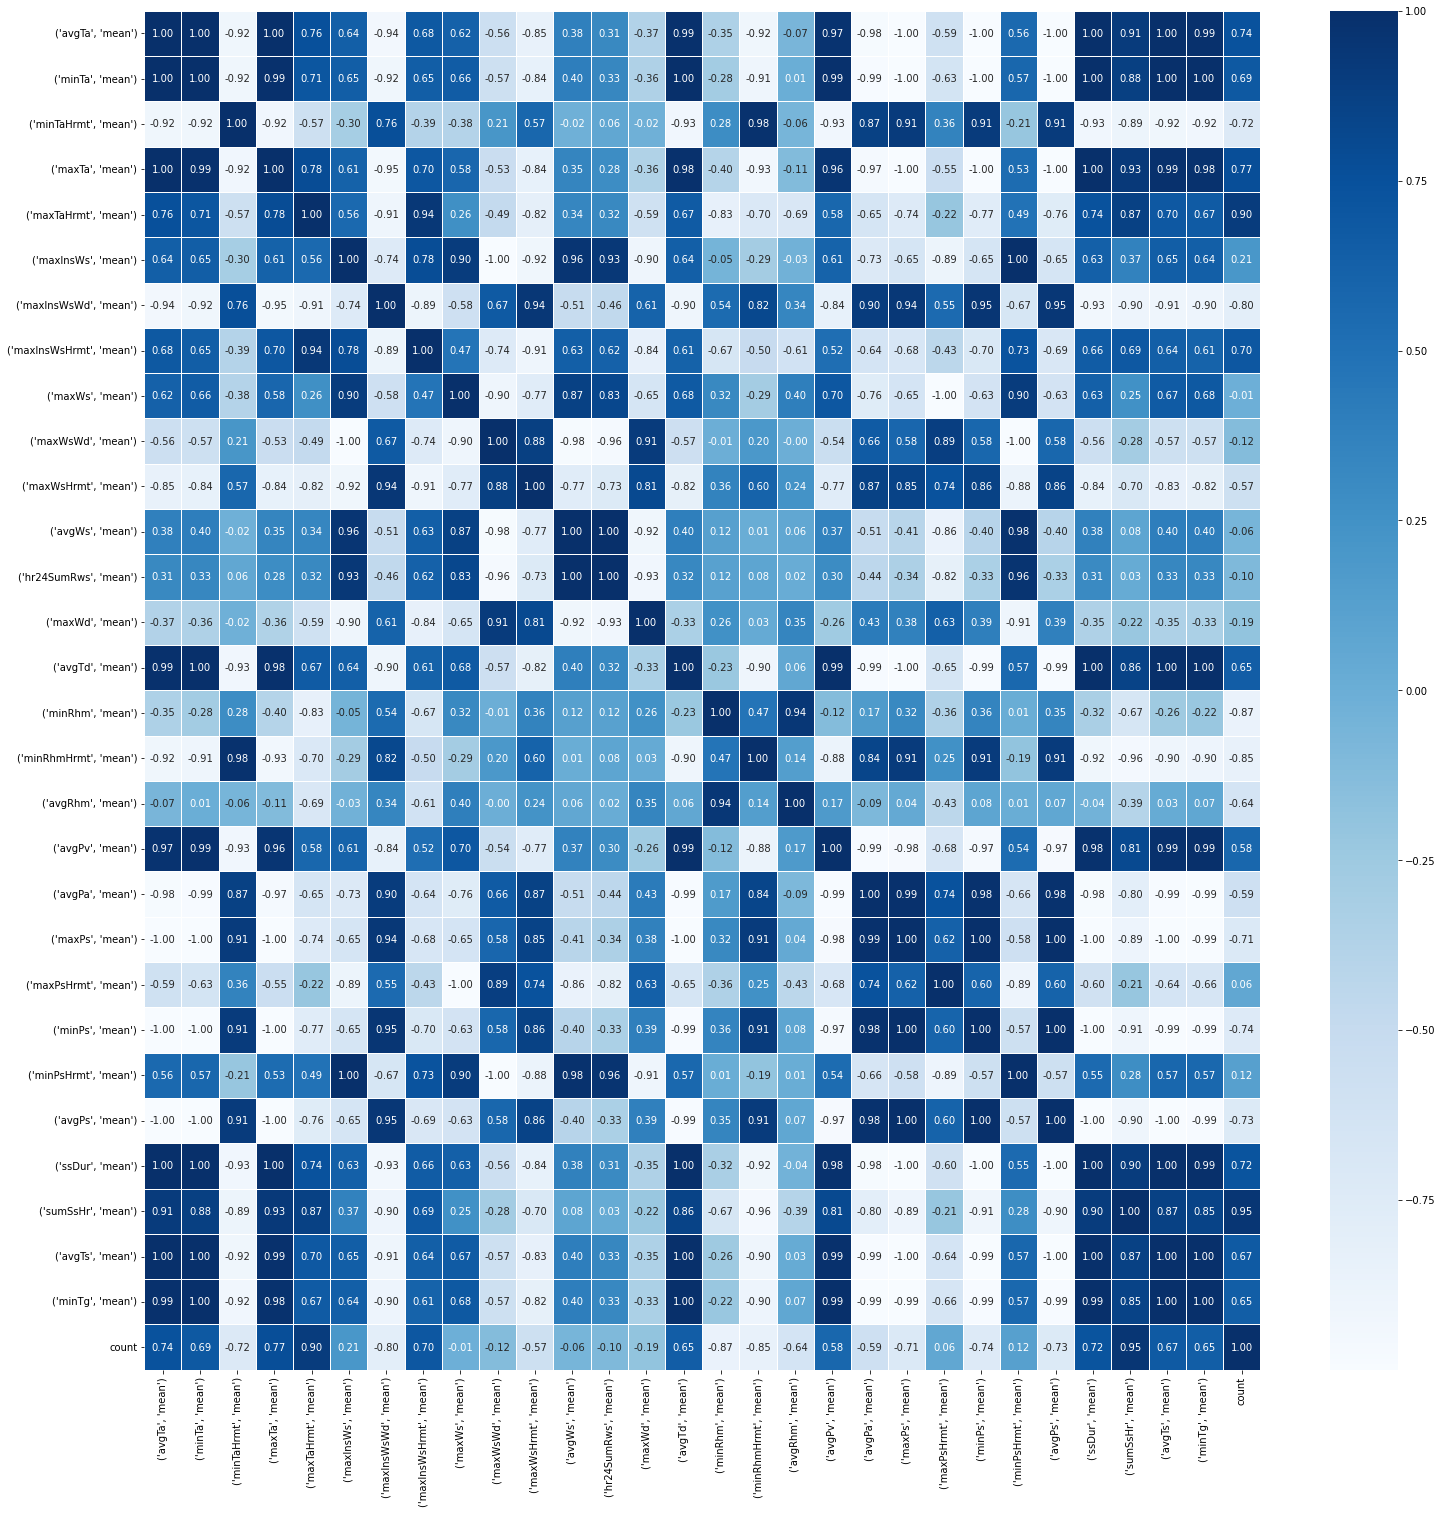

In [17]:
# df_new.corr()
# 히트맵 그려보기
plt.figure(figsize=(25, 25))
sns.heatmap(data = df_new.corr(), annot = True
            , fmt = '.2f', linewidths =.5, cmap= 'Blues')

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.datasets import 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix, recall_score, precision_score

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [19]:
# 새로운 데이터 프레임 = pd.DataFrame(기존 데이터 프레임.컬럼명.str.split('\t', 몇개 열로 나눌지).tolist(),
#                                    columns = ['컬럼 이름~~~'])

weather_c = pd.DataFrame(wether.tm.str.split('-', 3).tolist(),
                  columns = ['년', '월', '일'])

In [20]:
wether['stnNm']

0        속초
1        속초
2        속초
3        속초
4        속초
         ..
51137    인제
51138    인제
51139    인제
51140    인제
51141    인제
Name: stnNm, Length: 51142, dtype: object

In [21]:
weather = pd.concat([wether, weather_c], axis=1)

weather['월'] = weather['월'].astype('int')
condition_mon = ((weather['월'] > 1 ) & (weather['월'] < 6))

weather = weather[condition_mon]

# condition_reg = (weather['stnNm'] == '강원')

# weather = weather[condition_reg]


In [22]:
# sanbul_data
# 산불 난 지역 1
sanbul_region['target'] = 1

sanbul_region['day_place'] = sanbul_region['tm'] + sanbul_region['발생장소_시군구']
weather['day_place'] = weather['tm'] + weather['stnNm']

sanbul_region

sanbul_lo = pd.merge(weather, sanbul_region, on = 'day_place', how = 'outer')

# 산불나지 않은 날에 target 0
sanbul_lo.loc[sanbul_lo['target'] != sanbul_lo['target'], 'target'] = '0'

C:\Users\user\AppData\Local\Temp\ipykernel_22556\4106675372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_region['target'] = 1
C:\Users\user\AppData\Local\Temp\ipykernel_22556\4106675372.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sanbul_region['day_place'] = sanbul_region['tm'] + sanbul_region['발생장소_시군구']


In [23]:
# sanbul_lo = sanbul_lo[['target', 'minTa', 'maxInsWs', 'maxInsWsWd', 'maxInsWsWd', 'maxWs', 'avgWs', 'avgTd', 'minRhm', 'avgRhm', 'avgPv', 'minTg']]
sanbul_lo = sanbul_lo[['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt',
       'mi10MaxRn', 'mi10MaxRnHrmt', 'hr1MaxRn', 'hr1MaxRnHrmt', 'sumRnDur',
       'sumRn', 'maxInsWs', 'maxInsWsWd', 'maxInsWsHrmt', 'maxWs', 'maxWsWd',
       'maxWsHrmt', 'avgWs', 'hr24SumRws', 'maxWd', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPs', 'maxPsHrmt', 'minPs',
       'minPsHrmt', 'avgPs', 'ssDur', 'sumSsHr', 'hr1MaxIcsrHrmt',
       'hr1MaxIcsr', 'sumGsr', 'ddMefs', 'ddMefsHrmt', 'ddMes', 'ddMesHrmt',
       'sumDpthFhsc', 'avgTca', 'avgLmac', 'avgTs', 'minTg', 'avgCm5Te',
       'avgCm10Te', 'avgCm20Te', 'avgCm30Te', 'avgM05Te', 'avgM10Te',
       'avgM15Te', 'avgM30Te', 'avgM50Te', 'sumLrgEv', 'sumSmlEv', 'n99Rn',
       'iscs', 'sumFogDur', 'target', '월']]

sanbul_lo.dropna(subset = ['avgTa', 'maxTa','maxInsWsHrmt','minRhmHrmt', 'avgRhm'], inplace = True)

sanbul_lo.isnull().sum()

sanbul_lo.dropna(axis=1, inplace=True)

In [24]:
# sanbul_lo['avgTa'] = sanbul_lo['avgTa'].astype('int')
# sanbul_lo['minTa'] = sanbul_lo['minTa'].astype('int')
# sanbul_lo['minRhmHrmt'] = sanbul_lo['minRhmHrmt'].astype('int')
# sanbul_lo['maxInsWsHrmt'] = sanbul_lo['maxInsWsHrmt'].astype('int')
# sanbul_lo['minTaHrmt'] = sanbul_lo['minTaHrmt'].astype('int')
# sanbul_lo['maxTaHrmt'] = sanbul_lo['maxTaHrmt'].astype('int')
# sanbul_lo['minTaHrmt'] = sanbul_lo['minTaHrmt'].astype('int')
# sanbul_lo['maxWsHrmt'] = sanbul_lo['maxWsHrmt'].astype('int')
# sanbul_lo['maxTa'] = sanbul_lo['maxTa'].astype('int')
# sanbul_lo['maxInsWs'] = sanbul_lo['maxInsWs'].astype('int')
# sanbul_lo['maxInsWsWd'] = sanbul_lo['maxInsWsWd'].astype('int')
# sanbul_lo['avgTd'] = sanbul_lo['avgTd'].astype('int')
# sanbul_lo['avgRhm'] = sanbul_lo['avgRhm'].astype('int')
# sanbul_lo['maxWsWd'] = sanbul_lo['maxWsWd'].astype('int')
# sanbul_lo['target'] = sanbul_lo['target'].astype('int')
sanbul_lo = sanbul_lo.astype('int')
sanbul_lo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16851 entries, 0 to 16863
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   avgTa         16851 non-null  int32
 1   minTa         16851 non-null  int32
 2   minTaHrmt     16851 non-null  int32
 3   maxTa         16851 non-null  int32
 4   maxTaHrmt     16851 non-null  int32
 5   maxInsWs      16851 non-null  int32
 6   maxInsWsWd    16851 non-null  int32
 7   maxInsWsHrmt  16851 non-null  int32
 8   maxWsWd       16851 non-null  int32
 9   maxWsHrmt     16851 non-null  int32
 10  avgTd         16851 non-null  int32
 11  minRhm        16851 non-null  int32
 12  minRhmHrmt    16851 non-null  int32
 13  avgRhm        16851 non-null  int32
 14  avgPv         16851 non-null  int32
 15  avgPa         16851 non-null  int32
 16  maxPsHrmt     16851 non-null  int32
 17  minPsHrmt     16851 non-null  int32
 18  avgPs         16851 non-null  int32
 19  ssDur         16851 non-n

In [25]:
sanbul_lo.columns

Index(['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'maxInsWs',
       'maxInsWsWd', 'maxInsWsHrmt', 'maxWsWd', 'maxWsHrmt', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPsHrmt', 'minPsHrmt',
       'avgPs', 'ssDur', 'minTg', 'target', '월'],
      dtype='object')

In [26]:
# train test 나누기
from sklearn.preprocessing import StandardScaler


X = sanbul_lo[['avgTa', 'minTa', 'minTaHrmt', 'maxTa', 'maxTaHrmt', 'maxInsWs',
       'maxInsWsWd', 'maxInsWsHrmt', 'maxWsWd', 'maxWsHrmt', 'avgTd', 'minRhm',
       'minRhmHrmt', 'avgRhm', 'avgPv', 'avgPa', 'maxPsHrmt', 'minPsHrmt',
       'avgPs', 'ssDur', 'minTg']]

y = sanbul_lo[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123 )

# 데이터 컬럼 단위 정규화
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.fit_transform(X_test)


In [27]:
# model 불러오기
model = LogisticRegression()

# model 학습시키기
model.fit(X_train, y_train)

c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [28]:
type(X.columns)
column_names = list(X.columns)
type(column_names)


list

In [29]:
# beta x가 1단위 증가하였을때 logit값의 변화량
# 지수 odds 값의 변화량

# beta > 0  -> odds 1이상 증가 -> P(Y = 1)가 급증 risky
# beta < 0  -> odds 1미만 증가 -> P(Y = 1)가 급증 protective

In [30]:
# 데이터 컬럼에 따른 beta, exp(beta)체크
column_name = ['const'] + column_names
beta = np.concatenate([model.intercept_, model.coef_.reshape(-1)]).round(2) # 소수점 둘째자리까지 반올림
odds = np.exp(beta).round(2)
interpret = np.where(beta > 0, 'risky', 'protective') # np.where 조건문

# beta 해석 정리
beta_analysis = pd.DataFrame(np.c_[beta, odds, interpret], index = column_name, columns = ['beta', 'exp(beta)', 'interpret'])
beta_analysis

,beta,exp(beta),interpret
const,-5.06,0.01,protective
avgTa,0.12,1.13,risky
minTa,0.39,1.48,risky
minTaHrmt,0.02,1.02,risky
maxTa,1.94,6.96,risky
maxTaHrmt,0.24,1.27,risky
maxInsWs,0.14,1.15,risky
maxInsWsWd,0.02,1.02,risky
maxInsWsHrmt,-0.11,0.9,protective
maxWsWd,0.17,1.19,risky


In [31]:
# 예측
# 첫 컬럼 =  p가 y는 0일 확률 / 두번째 컬럼 = 산불 확률
model.predict_proba(X_test)



array([[0.92478304, 0.07521696],
       [0.99077989, 0.00922011],
       [0.98499721, 0.01500279],
       ...,
       [0.97987422, 0.02012578],
       [0.99602339, 0.00397661],
       [0.99833596, 0.00166404]])

In [32]:
# X_test에 대한 P(Y=0) 예측 확률값과 P(Y = 1) 예측 확률 값 - 직접 계산

# beta 곱하기 X 계산
Xbeta = np.matmul(np.c_[np.ones(X_test.shape[0]), X_test], beta.reshape(-1, 1))
# P(Y=1) 계산
P_1 = 1/ (1 + np.exp(-Xbeta))

# 패키지와 직접 계산 결과 비교
pd.DataFrame(np.concatenate([P_1, model.predict_proba(X_test)[:,1].reshape(-1, 1)], axis = 1), columns = ['직접', '패키지'])


,직접,패키지
0,0.075502,0.075217
1,0.009214,0.009220
2,0.015021,0.015003
3,0.002592,0.002562
4,0.001979,0.001946
...,...,...
5051,0.001559,0.001567
5052,0.004143,0.004121
5053,0.020137,0.020126
5054,0.003991,0.003977


In [33]:

from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
y_pred
accuracy_score(y_pred, y_test)

cfmat = confusion_matrix(y_test, y_pred)
# print(cfmat)

print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.98      1.00      0.99      4953
     class 1       0.00      0.00      0.00       103

    accuracy                           0.98      5056
   macro avg       0.49      0.50      0.49      5056
weighted avg       0.96      0.98      0.97      5056



c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

In [34]:
# 성능 평가
# cut_off = 정확도, 민감도, 정밀도 등등

Cut_off = np.linspace(0.01, 0.50, 10)

for cutoff in Cut_off:
    y_pred = np.where(P_1.reshape(-1) >= cutoff, 1, 0) # 확률값이 cut off보다 크면 1 산불, 아니면 0 산불X
    acc = accuracy_score(y_true = y_test, y_pred = y_pred) # 정확도 전체중 양성,음성 맞춘수
    recall = recall_score(y_true = y_test, y_pred = y_pred) # 민감도 양성중 맞춘 양성수
    precision = precision_score(y_true = y_test, y_pred = y_pred) # 정밀도 양성이라고 판정한 것 중 실제 양성 수
    
    print(acc, recall, precision, cutoff)


0.5830696202531646 0.8640776699029126 0.0407695831424645 0.01
0.932753164556962 0.2912621359223301 0.10101010101010101 0.06444444444444444
0.9721123417721519 0.11650485436893204 0.1935483870967742 0.11888888888888888
0.9768591772151899 0.038834951456310676 0.18181818181818182 0.17333333333333334
0.9790348101265823 0.009708737864077669 0.2 0.22777777777777777
0.9792325949367089 0.0 0.0 0.2822222222222222
0.979628164556962 0.0 0.0 0.33666666666666667
0.979628164556962 0.0 0.0 0.3911111111111111
0.979628164556962 0.0 0.0 0.44555555555555554
0.979628164556962 0.0 0.0 0.5


c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\user\AppData\Local\Progra

Text(0, 0.5, 'True Positive Rate')

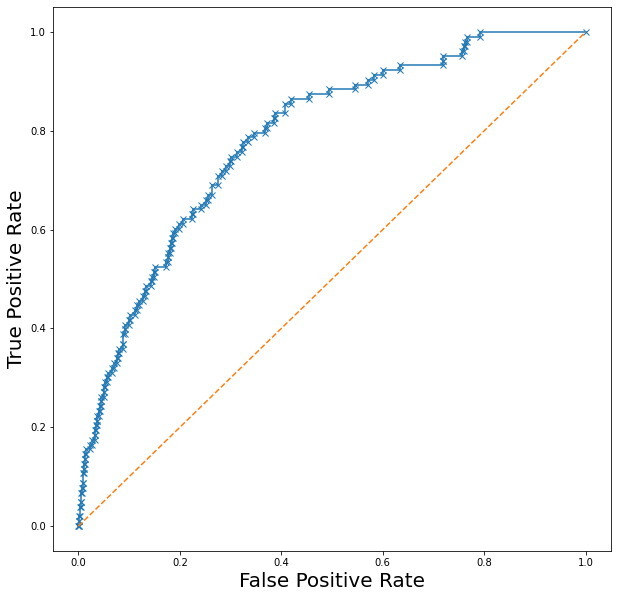

In [35]:
# X_test에 대한 예측확률
from sklearn import random_projection


probs = model.predict_proba(X_test)[:, 1]

# ROC curve X축, Y축 추출
model_fpr, model_tpr, threshold1 = roc_curve(y_test, probs)
random_fpr, random_tpr, threshold2 = roc_curve(y_test, [0 for i in range(X_test.__len__())])

# plot the roc curve for the model and random
plt.figure(figsize = (10, 10))
plt.plot(model_fpr, model_tpr, marker = 'x', label = 'Logistic')
plt.plot(random_fpr, random_tpr, linestyle = '--', label = 'Random')

# axis labels
plt.xlabel('False Positive Rate', size = 20)
plt.ylabel('True Positive Rate', size = 20)


In [36]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0
